## Descripción del Conjunto de Datos de Viviendas de Boston

- **CRIM**: Tasa de criminalidad per cápita por ciudad.
- **ZN**: Proporción de terreno residencial zonificado para lotes grandes.
- **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
- **CHAS**: Indica si la vivienda está cerca del río Charles (1 si sí, 0 si no).
- **NOX**: Concentración de óxidos de nitrógeno.
- **RM**: Número promedio de habitaciones por vivienda.
- **AGE**: Proporción de viviendas construidas antes de 1940.
- **DIS**: Distancias ponderadas a centros de empleo en Boston.
- **RAD**: Índice de accesibilidad a carreteras principales.
- **TAX**: Tasa de impuesto a la propiedad.
- **PTRATIO**: Relación entre alumnos y profesores por ciudad.
- **B**: Proporción calculada a partir de la fórmula dada relacionada con la población negra por ciudad 1000(Bk - 0.63)^2
- **LSTAT**: Porcentaje de población de menor estatus económico.
- **MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

![texto alternativo](https://files.keepingcurrentmatters.com/wp-content/uploads/2015/02/Cost-vs-Price1.jpg)


### El objetivo de este proyecto de Machine Learning es predecir el precio de las casas (MEDV)

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler

from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore")

## Lectura del dataset

In [2]:
df = pd.read_csv("boston_houses.csv")

df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
214,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7
451,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73,15.2
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93,28.4
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10,20.3
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3


## Limpieza de datos

Eliminación de las filas duplicadas y las que tengan datos nulos (NaN)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     508 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    509 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      509 non-null    float64
 5   RM       508 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      508 non-null    float64
 10  PTRATIO  509 non-null    float64
 11  B        500 non-null    float64
 12  LSTAT    509 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(14)
memory usage: 55.8 KB


In [4]:
df = df.drop_duplicates()
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 507
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     492 non-null    float64
 1   ZN       492 non-null    float64
 2   INDUS    492 non-null    float64
 3   CHAS     492 non-null    float64
 4   NOX      492 non-null    float64
 5   RM       492 non-null    float64
 6   AGE      492 non-null    float64
 7   DIS      492 non-null    float64
 8   RAD      492 non-null    float64
 9   TAX      492 non-null    float64
 10  PTRATIO  492 non-null    float64
 11  B        492 non-null    float64
 12  LSTAT    492 non-null    float64
 13  MEDV     492 non-null    float64
dtypes: float64(14)
memory usage: 57.7 KB


## Análisis exploratorio de datos (EDA)

Análisis del mapa de correlación

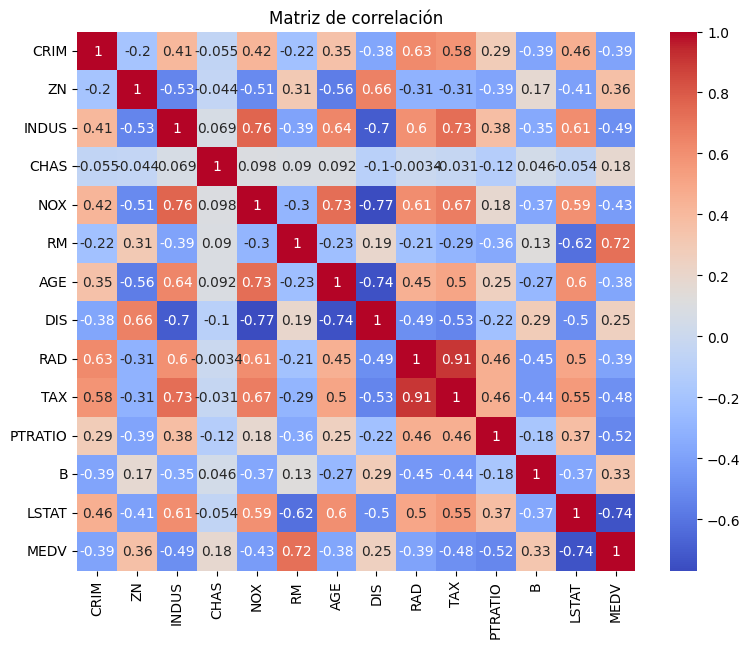

In [6]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

¿Qué features se deberían seleccionar?


Se debe considerar que los features sobrepasen cierto valor de correlación, corr > abs(val).
Donde val puede ser 0.4, 0.5, 0.6, etc. Eso se realiza bajo criterio, teniendo en cuenta que deberían haber 3 o más.

In [7]:
features = list(df.corr()["MEDV"][(df.corr()["MEDV"]>=0.45) | (df.corr()["MEDV"]<=-0.45)].index)
print(features)

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


Usando sns.displot() mostramos los histogramas de las features seleccionadas y de la salida. Y usando sns.regplot() mostramos los gráficos de dispersión de la salida VS las features seleccionadas.

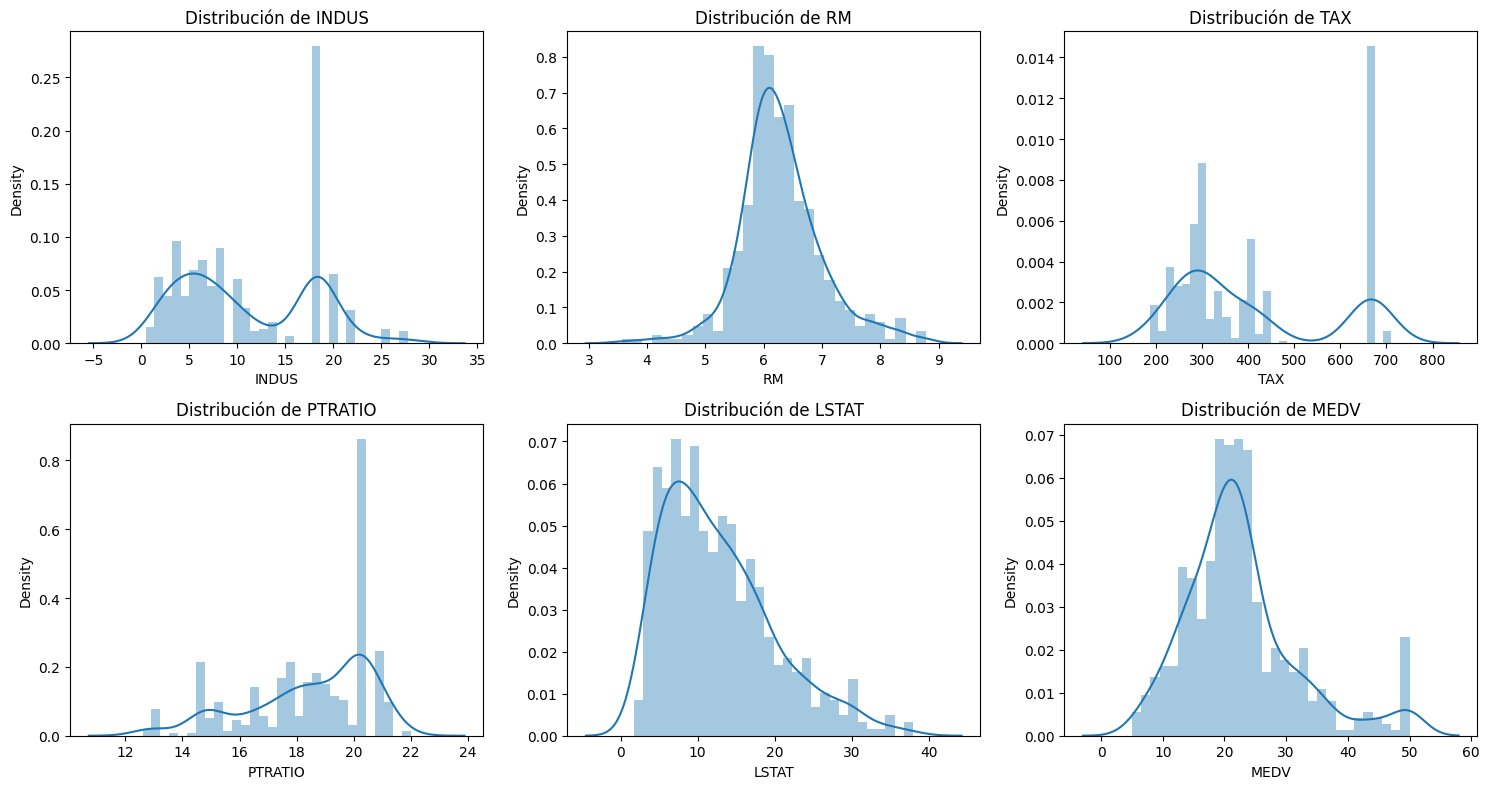

In [8]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

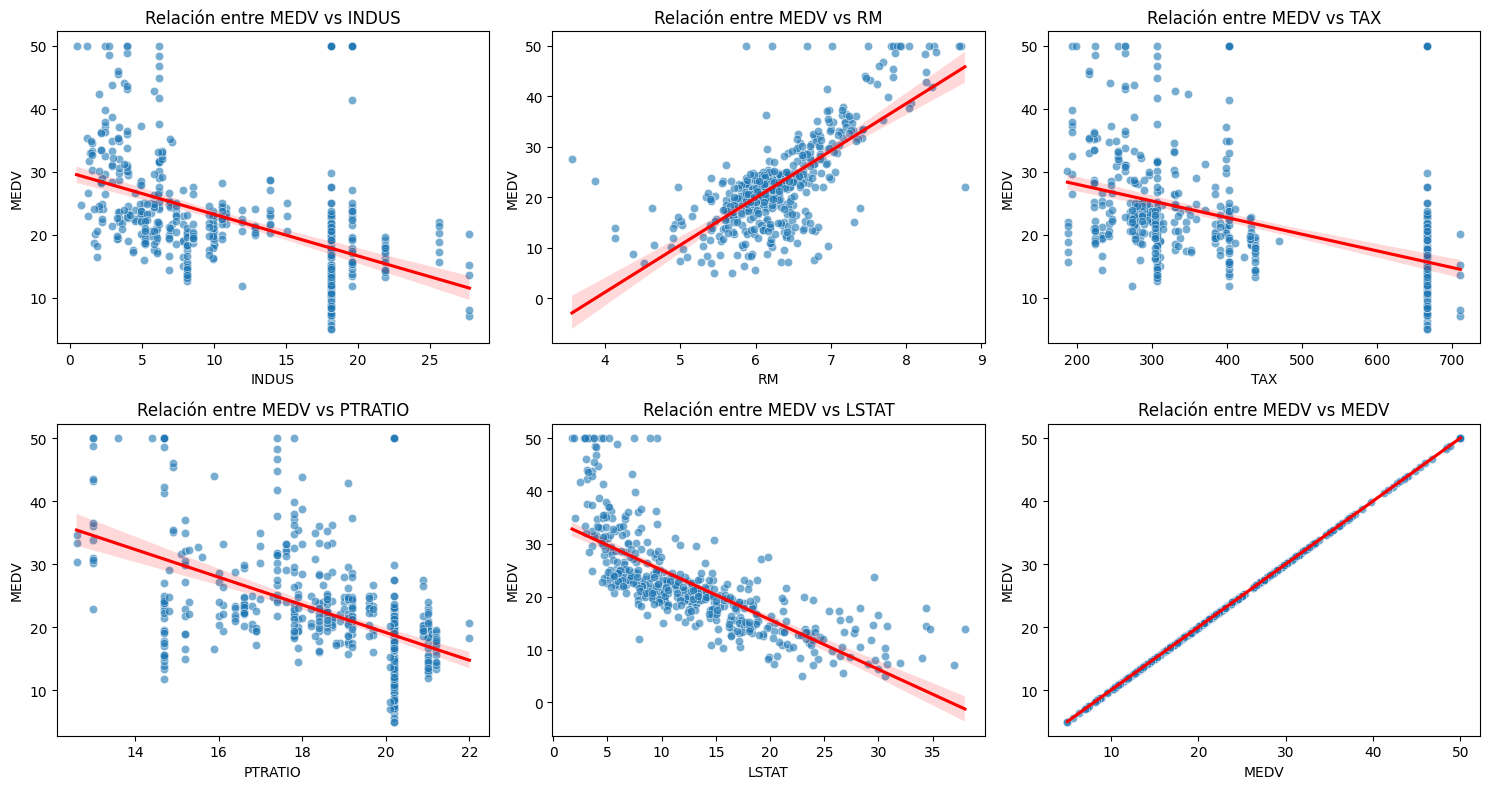

In [9]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y=df['MEDV'], alpha=0.6)
    sns.regplot(data=df, x=feature, y=df['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

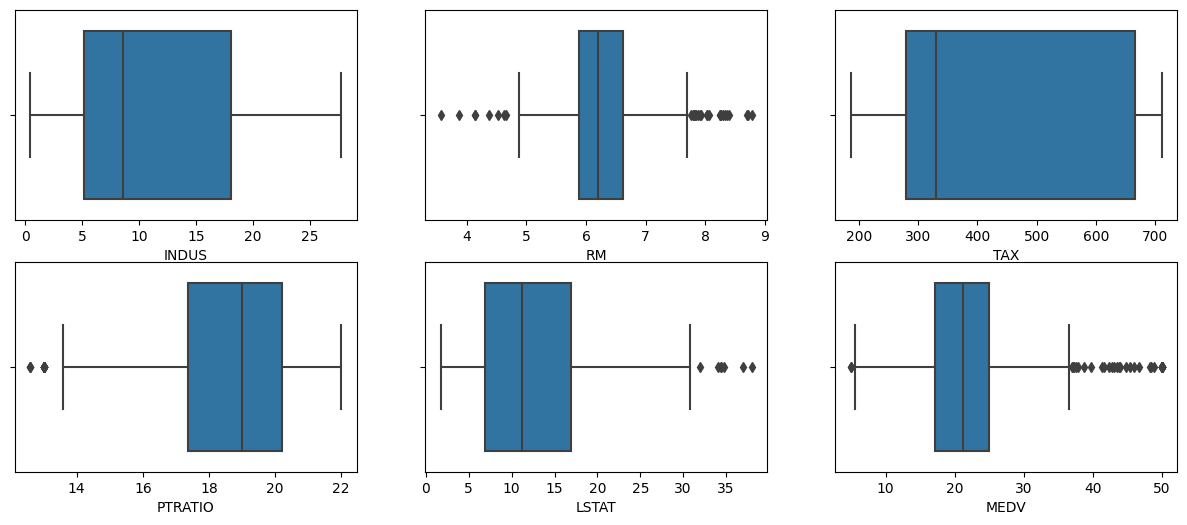

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=ax[i//3, i%3])

plt.show()

## Preprocesamiento de datos

Análisis de la feature "CHAS" usando value_counts() y gráfico de cómo se distribuye para cada valor (0 o 1)

¿Se debe hacer algún remuestreo (oversamplig o undersampling)?

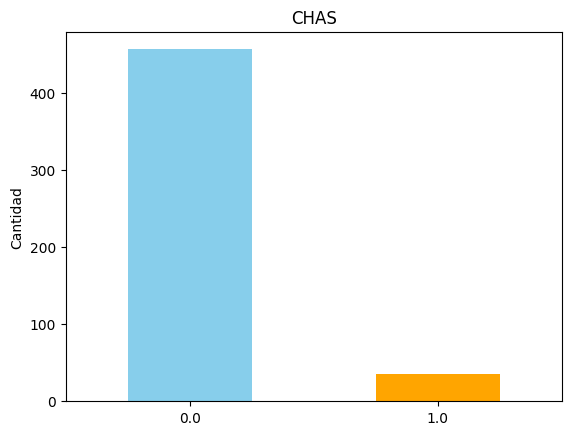

In [11]:
cuenta = df['CHAS'].value_counts()

cuenta.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('CHAS')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

In [12]:
# Hacemos el remuestreo
ros = RandomOverSampler(random_state=42)

X = df.drop('CHAS', axis=1)
y = df['CHAS']

X_ros, y_ros = ros.fit_resample(X, y)

df_resampled = pd.DataFrame(X_ros, columns=df.columns.drop('CHAS'))
df_resampled['CHAS'] = y_ros

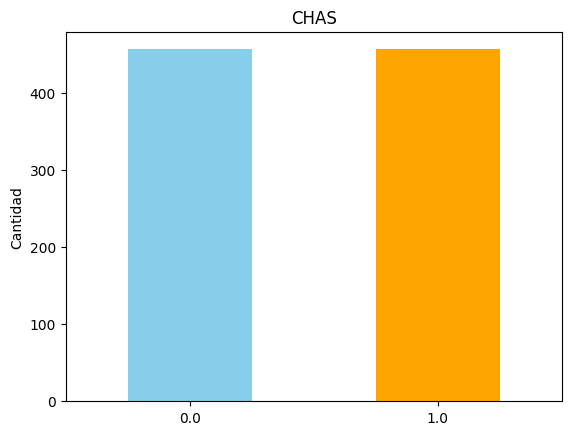

In [13]:
cuenta = df_resampled['CHAS'].value_counts()

cuenta.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('CHAS')
plt.xticks(rotation=0)
plt.ylabel('Cantidad')
plt.show()

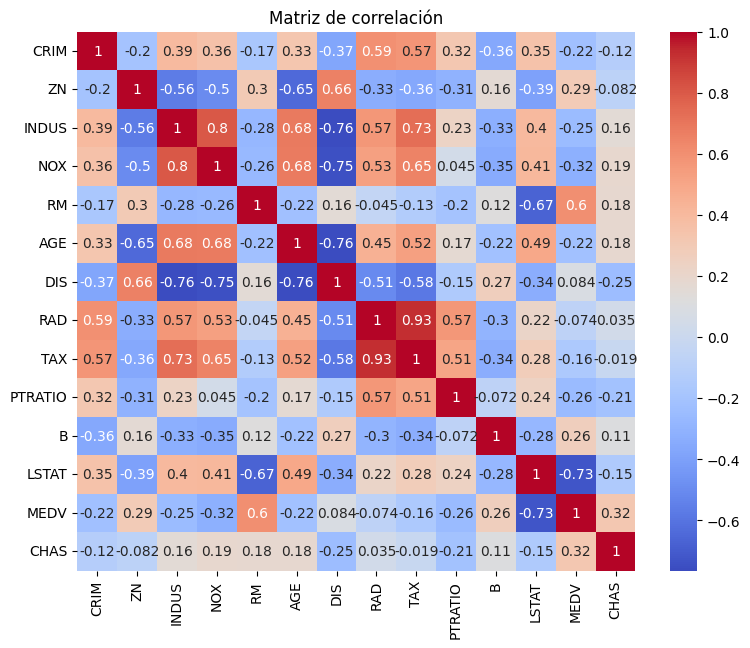

In [14]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_resampled.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()

In [15]:
features = list(df_resampled.corr()["MEDV"][(df_resampled.corr()["MEDV"]>=0.45) | (df_resampled.corr()["MEDV"]<=-0.45)].index)
print(features)

['RM', 'LSTAT', 'MEDV']


#### Luego de haber remuestreado los datos para que la columna CHAS esté balanceada, nos damos cuenta que los resultados no han mejorado. Si bien es cierto, la correlación de CHAS con MEDV mejoró un poco (pasó de 0.18 a 0.32), esta sigue siendo menor a 0.45, por lo cual quiere decir que no nos es útil. Luego del remuestreo, la correlación de otras features empeoró, por lo que ahora tenemos menos features útiles. Por ende,  se debe revertir esto y no considerar el remuestreo para seguir con el caso.

Ahora escalamos los datos: Puede ser StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler() u otras.

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df_scaled_1 = pd.DataFrame(data_scaled, columns = df.columns)

corr1 = df_scaled_1.corr()

features = list(corr1["MEDV"][(corr1["MEDV"]>=0.45) | (corr1["MEDV"]<=-0.45)].index)
print(features)

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


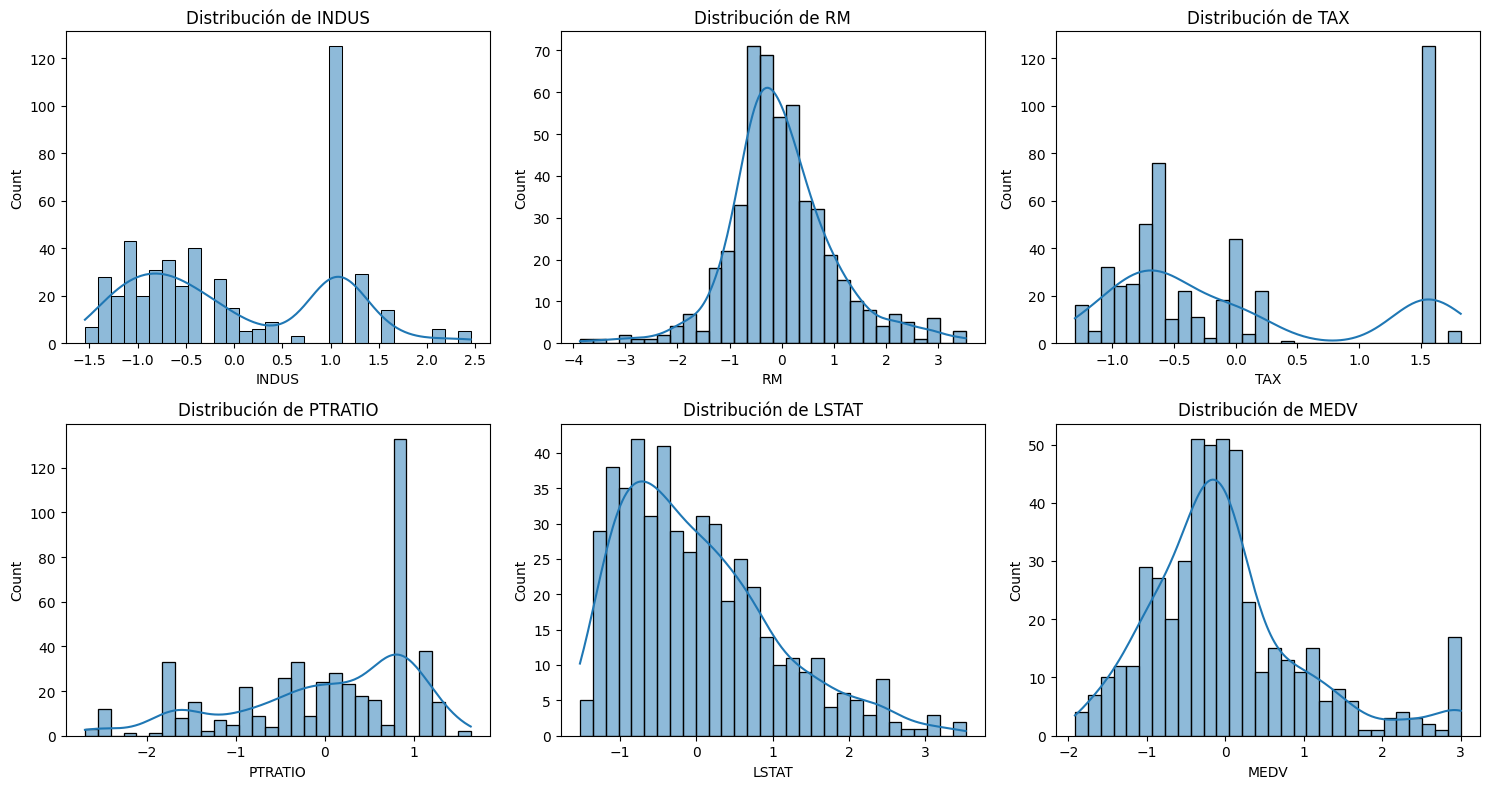

In [17]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df_scaled_1[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

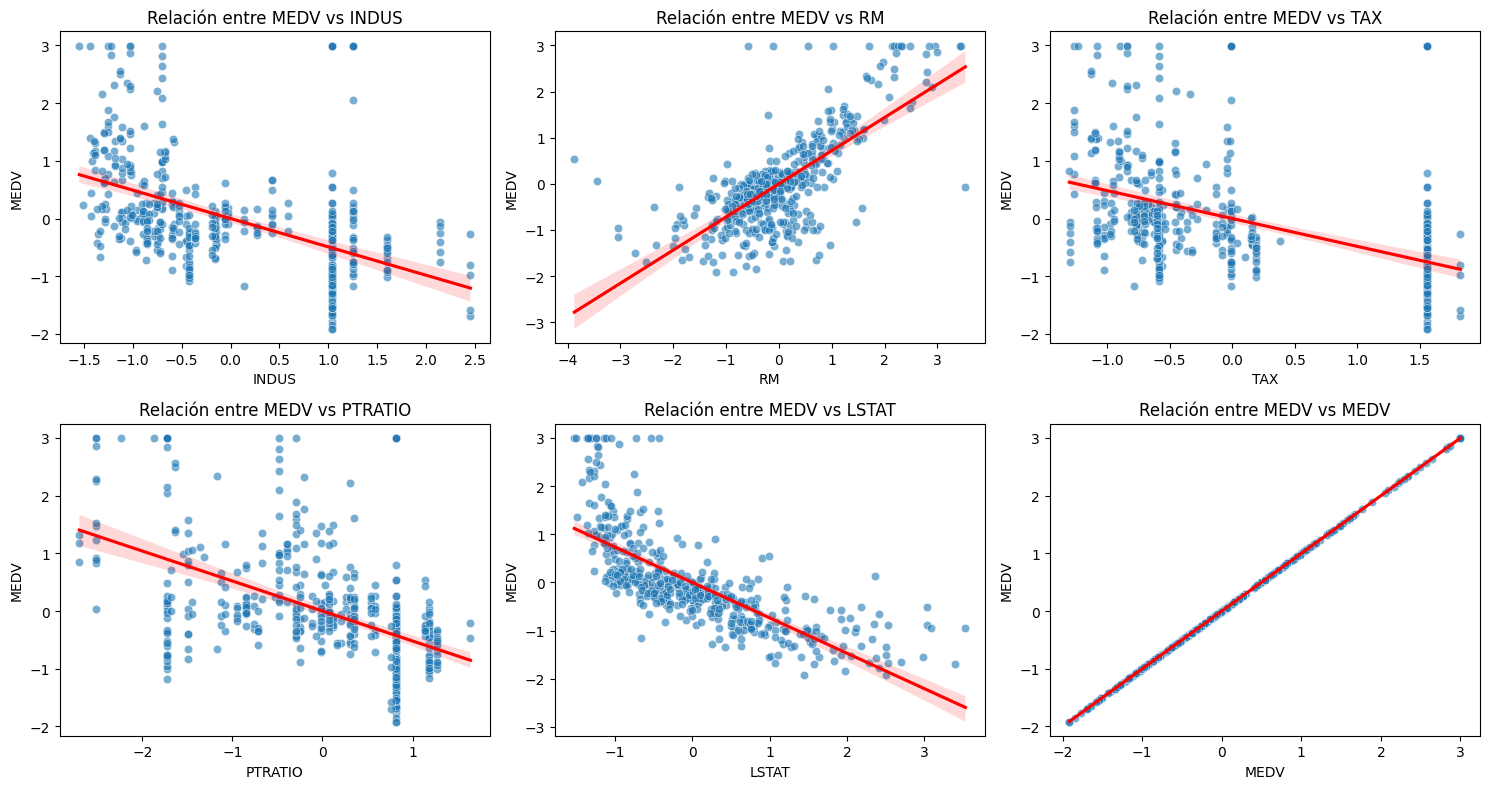

In [18]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_scaled_1, x=feature, y=df_scaled_1['MEDV'], alpha=0.6)
    sns.regplot(data=df_scaled_1, x=feature, y=df_scaled_1['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

In [19]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled_2 = pd.DataFrame(data_scaled, columns = df.columns)

corr2 = df_scaled_2.corr()

features = list(corr2["MEDV"][(corr2["MEDV"]>=0.45) | (corr2["MEDV"]<=-0.45)].index)
print(features)

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


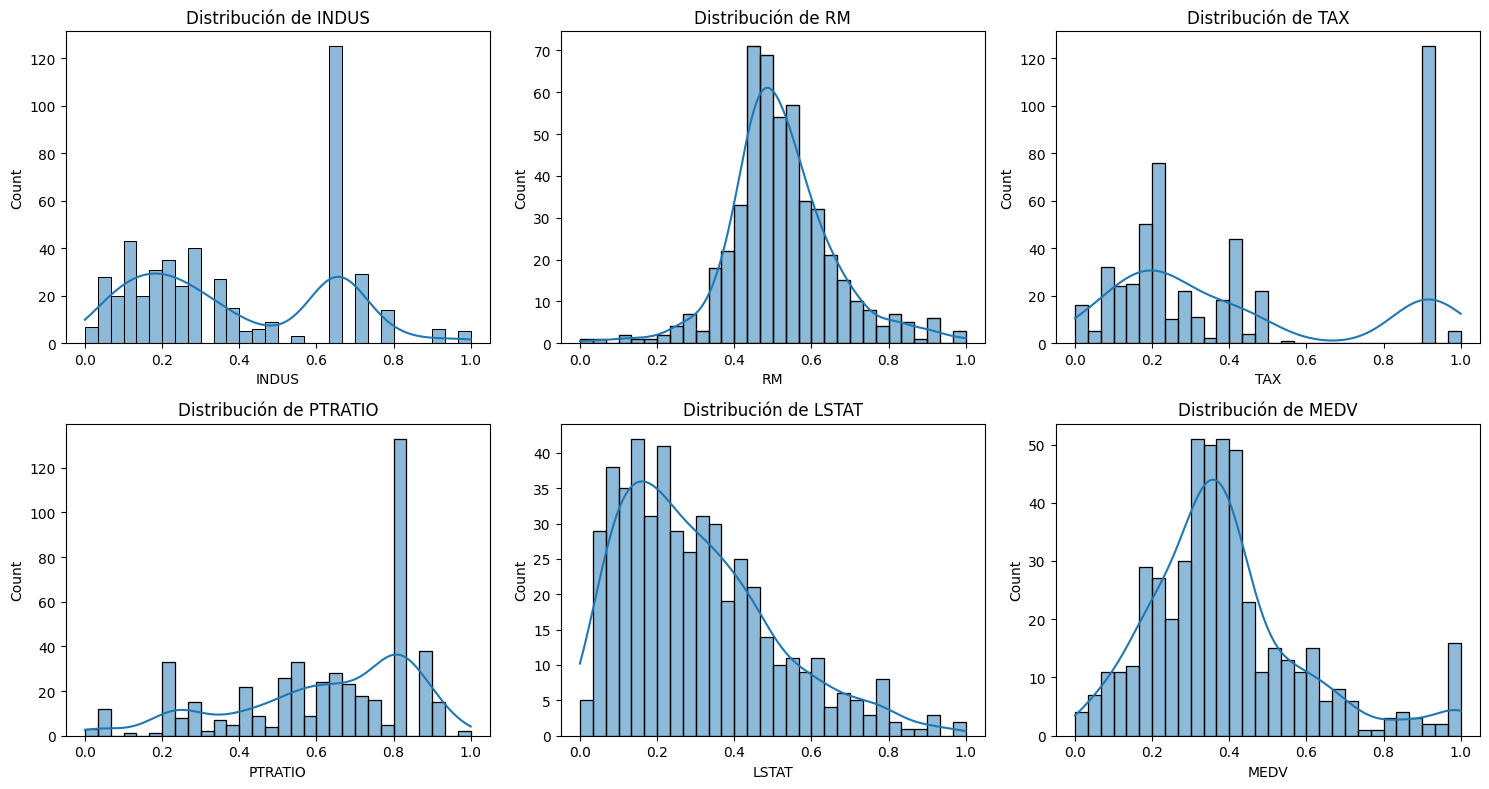

In [20]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df_scaled_2[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

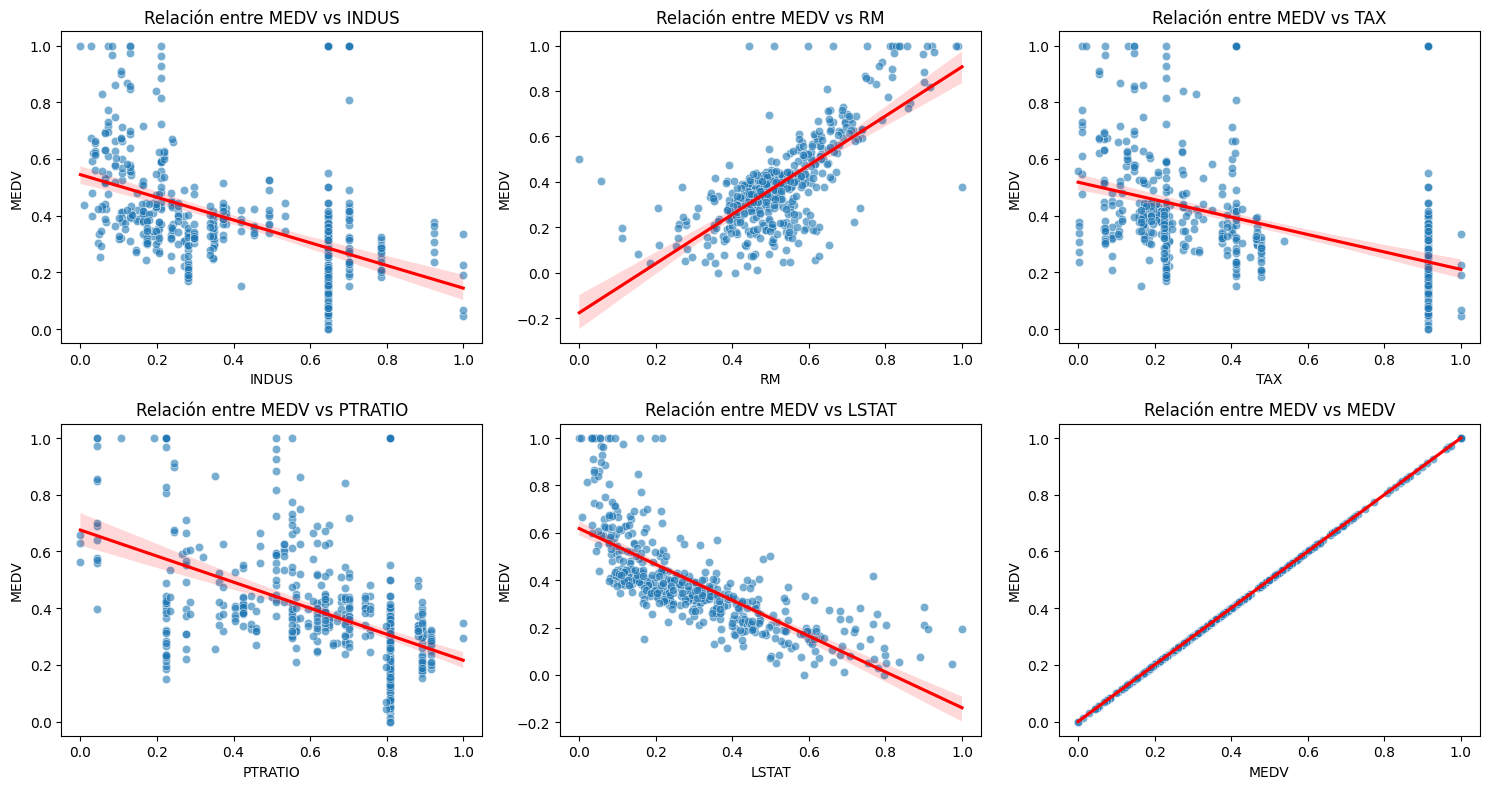

In [21]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_scaled_2, x=feature, y=df_scaled_2['MEDV'], alpha=0.6)
    sns.regplot(data=df_scaled_2, x=feature, y=df_scaled_2['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

In [22]:
scaler = Normalizer()
data_scaled = scaler.fit_transform(df)
df_scaled_3 = pd.DataFrame(data_scaled, columns = df.columns)

corr3 = df_scaled_3.corr()

features = list(corr3["MEDV"][(corr3["MEDV"]>=0.45) | (corr3["MEDV"]<=-0.45)].index)
print(features)

['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']


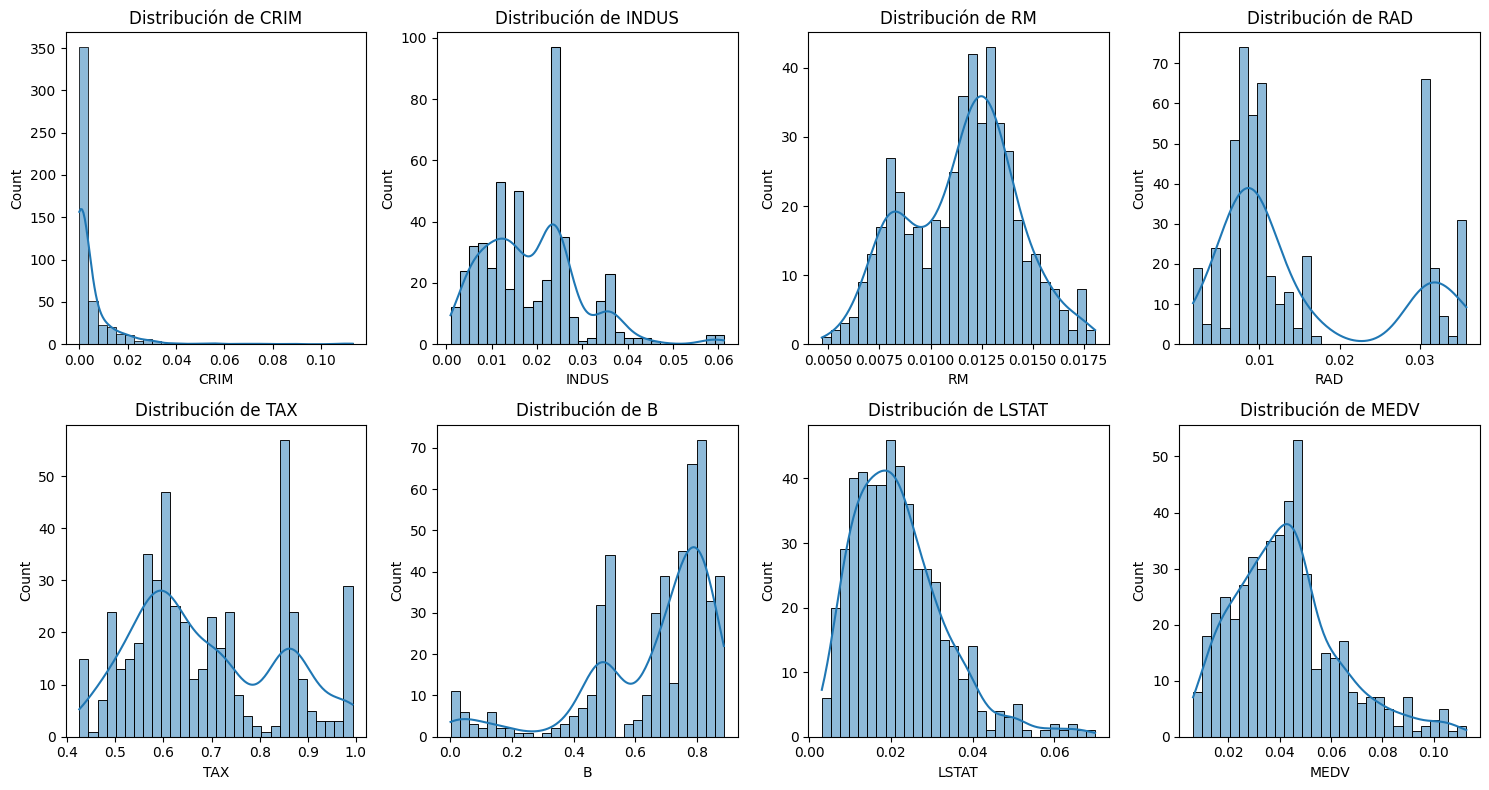

In [23]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.distplot(df_scaled_3[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

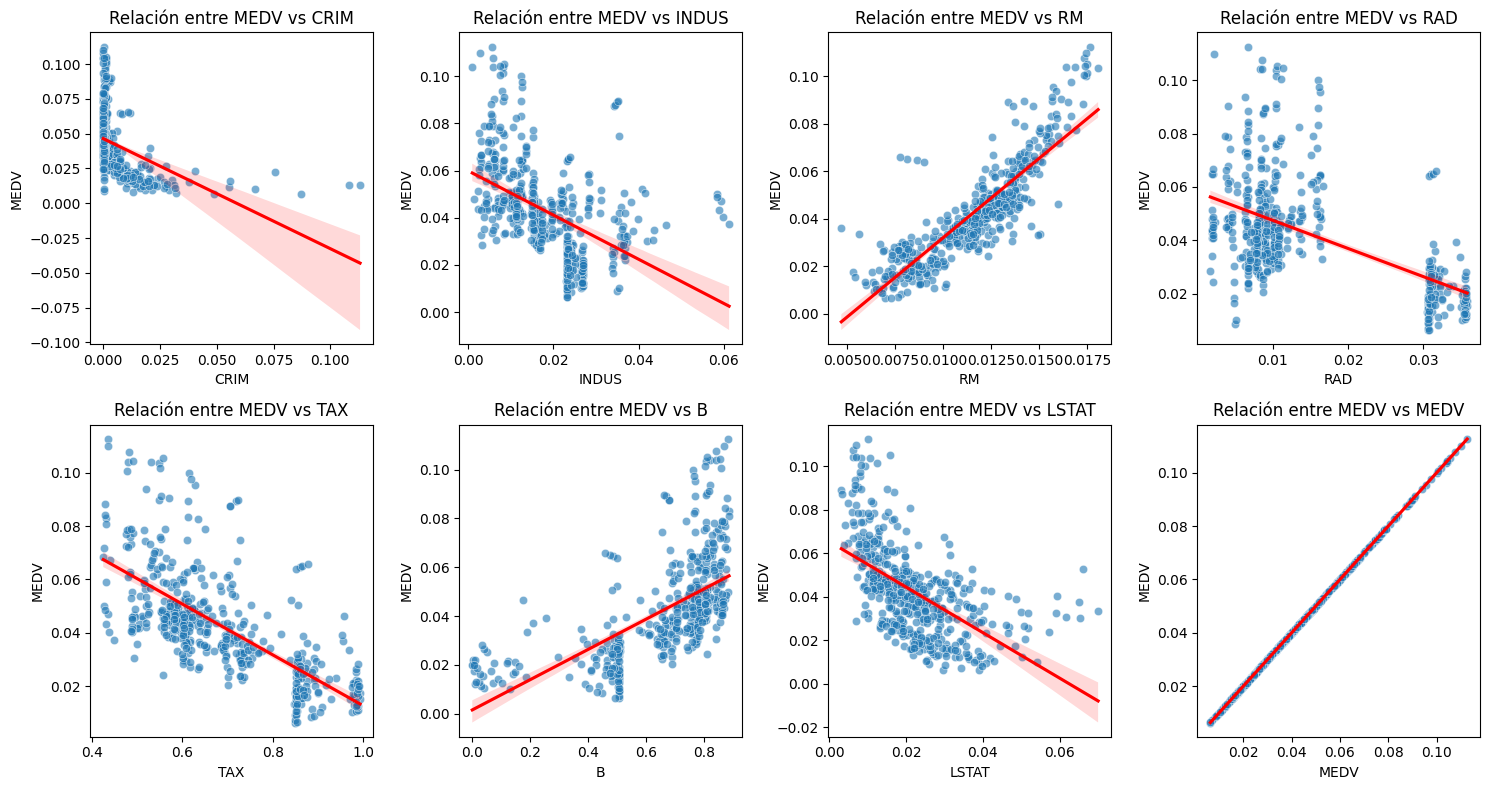

In [24]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=df_scaled_3, x=feature, y=df_scaled_3['MEDV'], alpha=0.6)
    sns.regplot(data=df_scaled_3, x=feature, y=df_scaled_3['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

In [25]:
scaler = MaxAbsScaler()
data_scaled = scaler.fit_transform(df)
df_scaled_4 = pd.DataFrame(data_scaled, columns = df.columns)

corr4 = df_scaled_4.corr()

features = list(corr4["MEDV"][(corr4["MEDV"]>=0.45) | (corr4["MEDV"]<=-0.45)].index)
print(features)

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


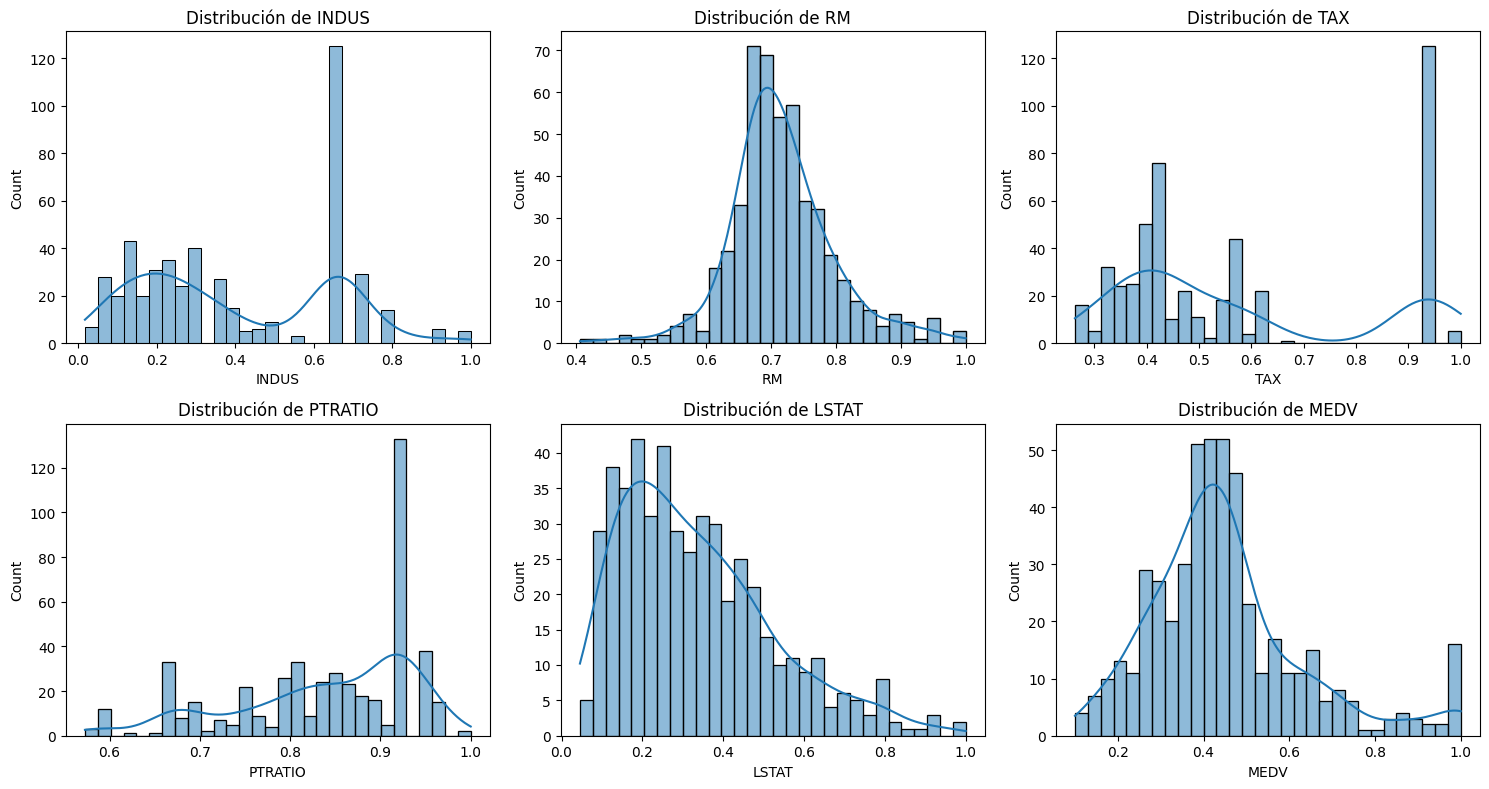

In [26]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df_scaled_4[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

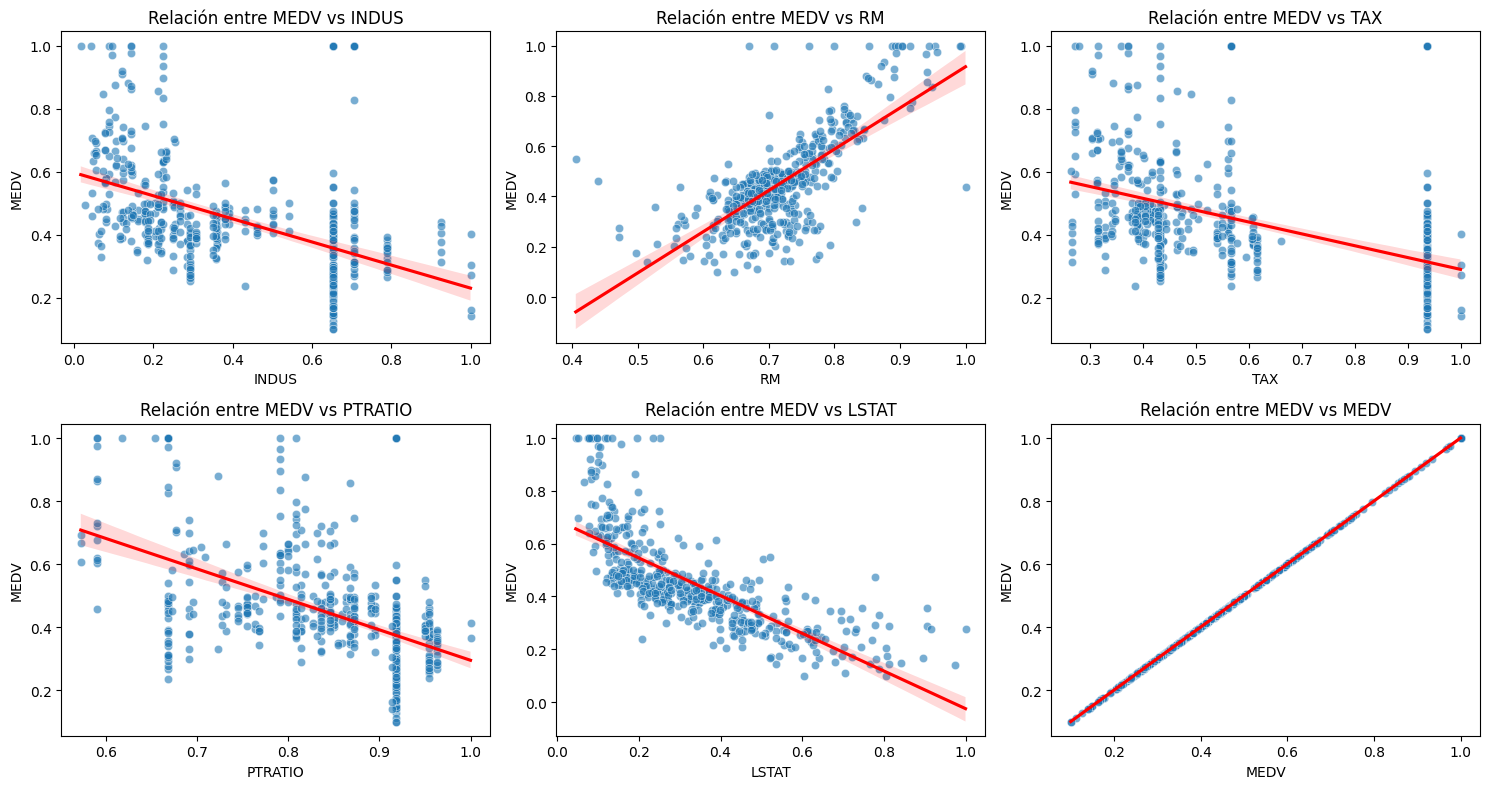

In [27]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_scaled_4, x=feature, y=df_scaled_4['MEDV'], alpha=0.6)
    sns.regplot(data=df_scaled_4, x=feature, y=df_scaled_4['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

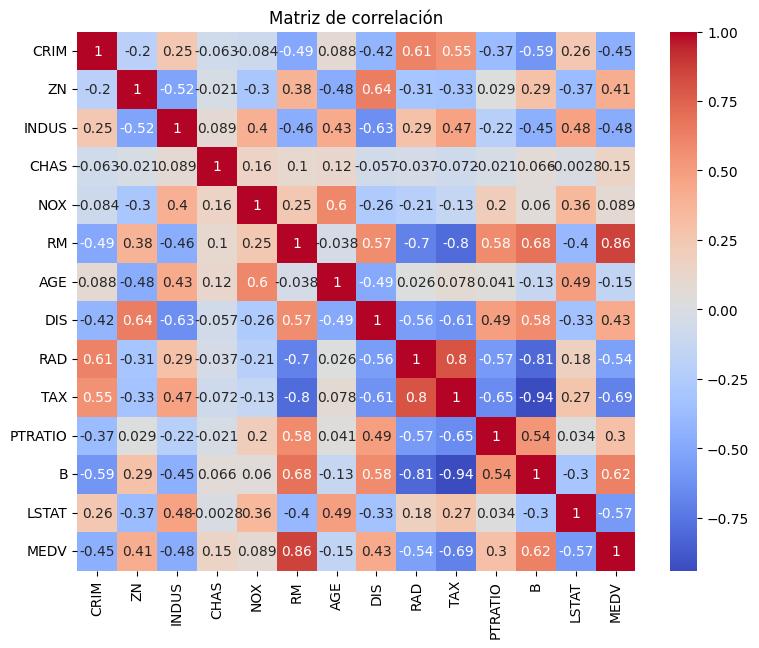

In [28]:
scaler = Normalizer()
data_scaled = scaler.fit_transform(df)
df_scaled_3 = pd.DataFrame(data_scaled, columns = df.columns)

corr3 = df_scaled_3.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr3, cmap="coolwarm", annot=True)
plt.title("Matriz de correlación")
plt.show()


Volvemos a hacer una selección de features y graficamos su displot y su regplot.

In [29]:
features = list(corr3["MEDV"][(corr3["MEDV"]>=0.45) | (corr3["MEDV"]<=-0.45)].index)
print(features)

['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV']


#### Observamos que luego de hacer el escalamiento con Normalizer, la cantidad de features aptos para la selección aumentó, por eso elegimos esa alternativa.

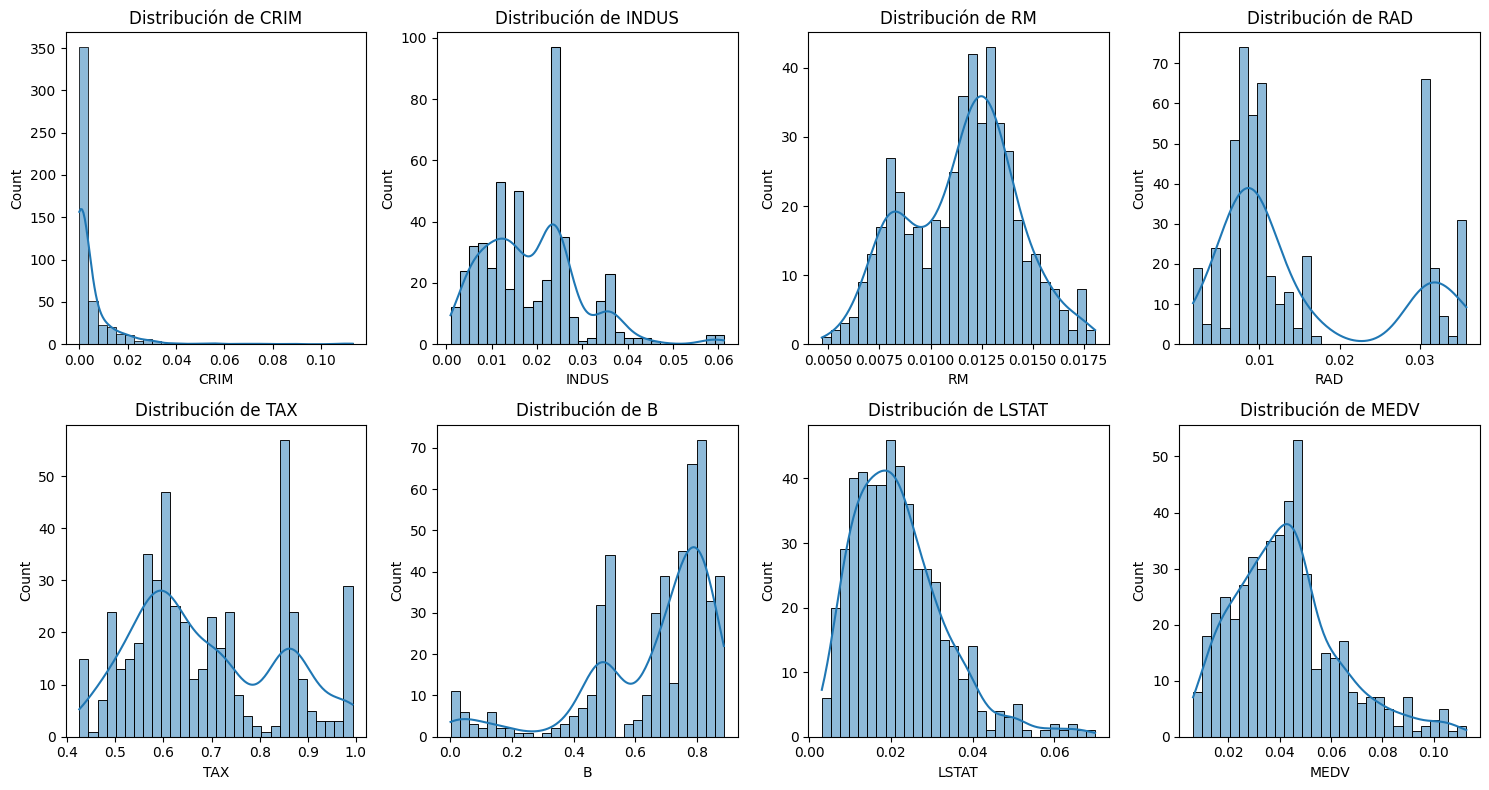

In [30]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_scaled_3[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()

plt.show()

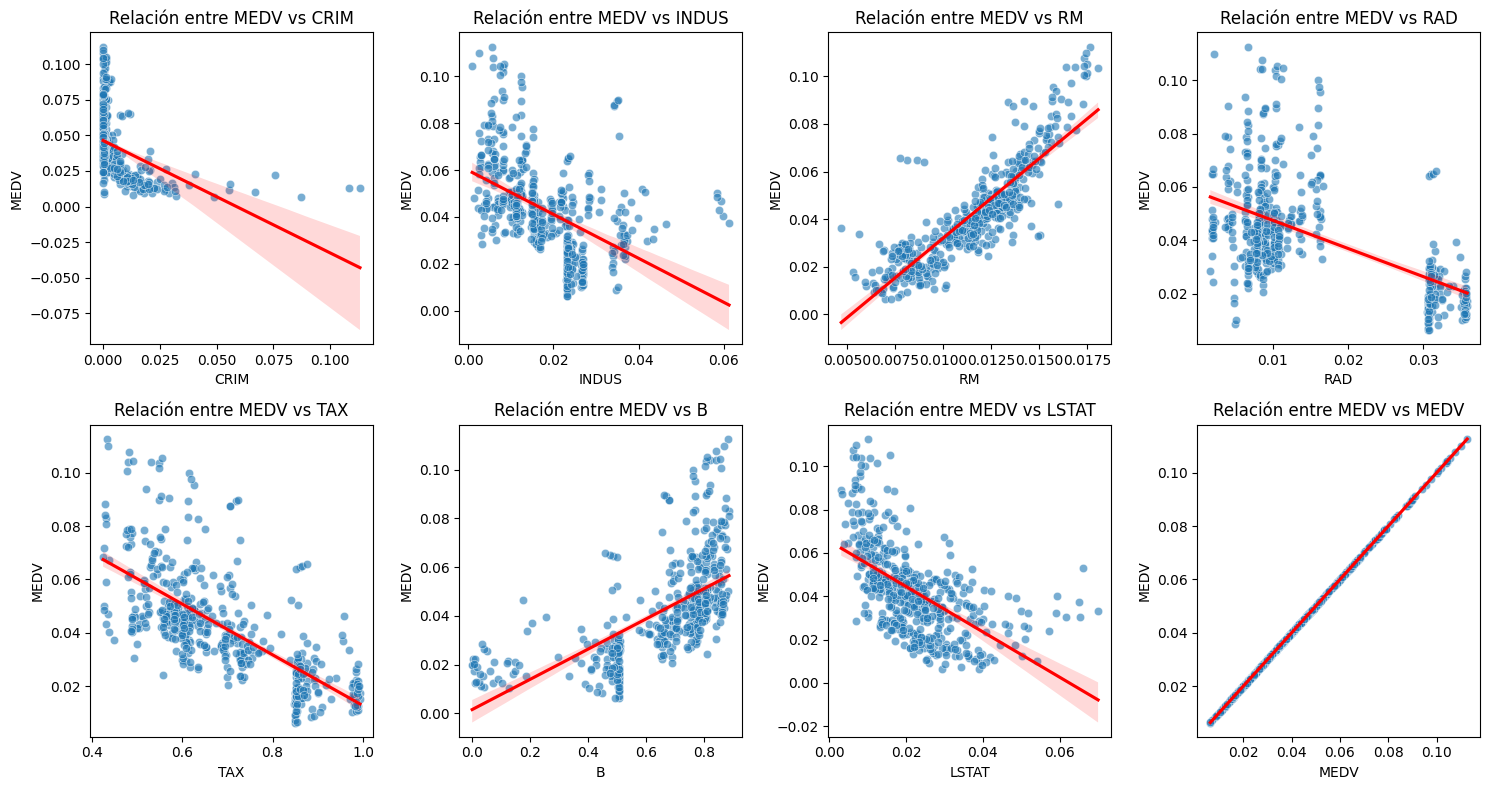

In [31]:
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=df_scaled_3, x=feature, y=df_scaled_3['MEDV'], alpha=0.6)
    sns.regplot(data=df_scaled_3, x=feature, y=df_scaled_3['MEDV'], scatter=False, color='red')
    plt.title(f'Relación entre MEDV vs {feature}')
    plt.tight_layout()

plt.show()

## Modelo de Regresión

Hacemos split de los datos para obtener sets de entreamiento y testeo, teniendo en cuenta que la semilla que utiliza (random_state), podemos elegir una y si ve que no nos da buenos resultados la podemos cambiar.

In [32]:
X = df_scaled_3[['CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT']]
y = df_scaled_3["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

Defimos el modelo y lo entrenamos.

In [33]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Mostramos los coeficientes y el intercepto obtenido.

In [34]:
a = modelo.coef_
b = modelo.intercept_

print(f"Coeficientes: {a}")
print(f"Intercepto {b}")

print("\nFunción:")
print(f"MEDV = ", end="")
for i in range(len(features)-1):
    print(f"{a[i]:.4f}*{features[i]}", end=" + ")
print(f"{b:.4f}")

Coeficientes: [-0.03960822  0.06632541  6.21792999  0.31828306  0.01190339  0.02301054
 -0.44535827]
Intercepto -0.04888247852863902

Función:
MEDV = -0.0396*CRIM + 0.0663*INDUS + 6.2179*RM + 0.3183*RAD + 0.0119*TAX + 0.0230*B + -0.4454*LSTAT + -0.0489


Analizamos las métricas de desempeño con el set de testeo.

In [36]:
y_pred = modelo.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  8.506720709464336e-05
MAE:  0.006619420432253835
R2:  0.8063384637731026


#### Tenemos métricas de error caudrático y error absoluto bastante bajas y un R2 de 0.806. Veremos si podemos mejorar ese R2 habiendo elegido otra semilla al momento del spliteo de los datos:

In [41]:
r2s = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = i)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2s.append(r2_score(y_test, y_pred))
    
print(f"Mejor valor encontrado: {max(r2s)}")
print(f"Semilla para obtener ese mejor valor: {r2s.index(max(r2s))}")


Mejor valor encontrado: 0.8738356758216466
Semilla para obtener ese mejor valor: 2


#### Como vemos, se halló que el mejor valor de R2 se obtiene cuando la semilla es 2, así que esa será la semilla que usaremos:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

a = modelo.coef_
b = modelo.intercept_

print(f"Coeficientes: {a}")
print(f"Intercepto {b}")

print("\nFunción:")
print(f"MEDV = ", end="")
for i in range(len(features)-1):
    print(f"{a[i]:.4f}*{features[i]}", end=" + ")
print(f"{b:.4f}")

y_pred = modelo.predict(X_test)
print("\nMSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

Coeficientes: [-0.05808993  0.09571044  6.06907538  0.36385265  0.01203557  0.02270417
 -0.47695832]
Intercepto -0.047229317753206816

Función:
MEDV = -0.0581*CRIM + 0.0957*INDUS + 6.0691*RM + 0.3639*RAD + 0.0120*TAX + 0.0227*B + -0.4770*LSTAT + -0.0472

MSE:  6.148369150395331e-05
MAE:  0.0058236243036272894
R2:  0.8738356758216466


Hacemos lo mismo con los modelos de Ridge y Lasso, tenga en cuenta elegir el mejor alpha posible (ver jupyter notebook de la clase 12)

### Para Ridge:

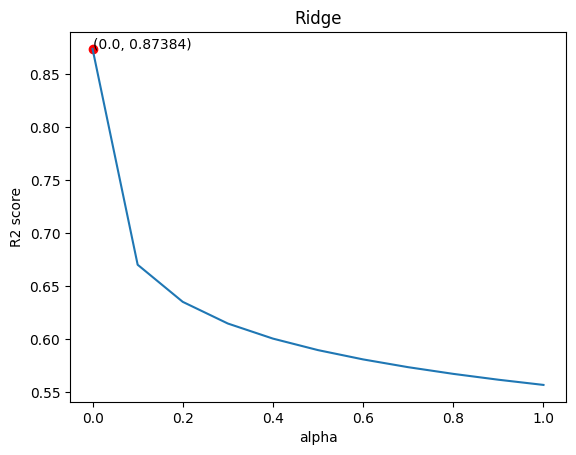

In [47]:
r2s = []
for i in np.arange(0.0, 1.1, 0.1):
    modelo_ridge = Ridge(alpha=i)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    r2s.append(r2_score(y_test, y_pred_ridge))
    
x = np.arange(0.0, 1.1, 0.1)
y_max = np.max(r2s)
x_max = x[np.argmax(r2s)]

plt.plot(x, r2s)
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'({x_max:.1f}, {y_max:.5f})', (x_max, y_max))
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Ridge")
plt.show()

### Para Lasso:

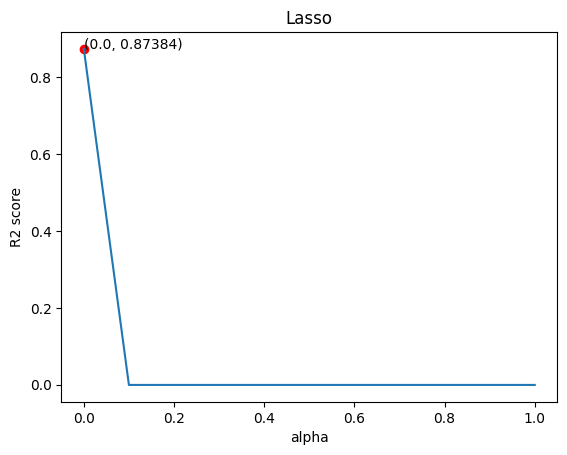

In [48]:
r2s = []
for i in np.arange(0.0, 1.1, 0.1):
    modelo_ridge = Lasso(alpha=i)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    r2s.append(r2_score(y_test, y_pred_ridge))
    
x = np.arange(0.0, 1.1, 0.1)
y_max = np.max(r2s)
x_max = x[np.argmax(r2s)]

plt.plot(x, r2s)
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'({x_max:.1f}, {y_max:.5f})', (x_max, y_max))
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Lasso")
plt.show()

Compare las métricas obtenidas en los 3 modelos

#### Observamos que al menos para este dataset, no tiene caso usar Ridge o Lasso, ya que se obtiene el mejor desempeño en estos cuando el alpha es 0, es decir, cuando el propio algoritmo de cada uno (Ridge y Lasso) no tiene efecto o diferencia con respecto al modelo de la regresión lineal clásica.

## Conclusiones finales

Finalmente, se obtuvo un modelo con MSE y MAE bastante bajos y con un R2 de 0.8738, lo cual quiere decir que nuestro modelo tiene un 87.38% de confiabilidad, el cual es un resultado bastante bueno, por lo que podemos decir que la generación del modelo cumplió los objetivos satisfactoriamente.

NOTA: Si considera que hay algún paso más que se deba adicionar para que el análisis y/o los resultados del laboratorio sean mejores, siéntase en libertad de añadirlos.